<a href="https://colab.research.google.com/github/HarshaVardhanBabu/TutorialMaterial/blob/master/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The  k -means algorithm is an unsupervised learning method for identifying clusters within a dataset. The  k  represents the number of clusters to be identified, which is specified by the user before starting the algorithm.

The algorithm goes like this:

Initialize the  k  cluster centroids.

Repeat:

Cluster assignment: Assign each data point to the nearest cluster centroid.

Cluster updating: For each cluster centroid, average the locations of it's corresponding points and re-assign the centroid to that location.

The last two steps are repeated until stopping criteria are met such as a maximum number of iterations or the centroid velocity drops below a threshold. 

The results of the algorithm can be highly dependent on the cluster initialization step, especially when there are a large number of clusters and data points. 

$c^{(i)} = argmin_{k} \left\lVert x^{(i)} - \mu_k\right\rVert^2$

where  $c^{(i)}$  is the centroid closest to sample  $x^{(i)}$  and  $\mu_k$  represents the  $k^{th}$ centroid.

Similarly, the cluster update step can be written as:

$\mu_k = \frac{1}{n}[x^{(k_1)}+x^{(k_2)}+...+x^{(k_n)}]$

where, again  $μ_k$  represents the  $ k^{th}$ centroid and  $x^{k_n}$  are the training examples assigned to that centroid.

In [0]:
import numpy as np
np.random.seed(0)
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [0]:
X,y = make_blobs(n_samples = 500, n_features = 2, centers = 5)

In [5]:
X.shape, y.shape

((500, 2), (500,))

Text(0, 0.5, '$x_2$')

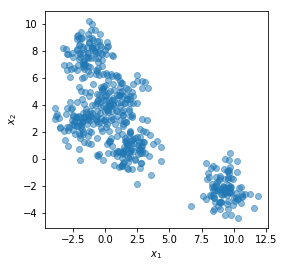

In [8]:
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(X[:,0], X[:,1], alpha=0.5)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

In [0]:
model = KMeans()

In [11]:
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [14]:
clusters = model.cluster_centers_
clusters

array([[-1.73485037,  6.80064158],
       [ 9.30286933, -2.23802673],
       [ 0.32132739,  3.44009256],
       [-2.12953371,  2.63207505],
       [-0.99905774,  8.43277244],
       [ 2.73389715,  1.010249  ],
       [ 1.15148131,  0.41573015],
       [ 1.19996367,  5.12362374]])

In [22]:
x_assigned = model.predict(X)
x_assigned

array([5, 2, 7, 3, 2, 1, 2, 1, 6, 6, 0, 3, 2, 4, 3, 1, 2, 1, 2, 3, 6, 1,
       6, 2, 6, 4, 6, 5, 0, 3, 6, 7, 2, 4, 2, 5, 6, 1, 1, 1, 4, 1, 3, 6,
       7, 2, 1, 2, 5, 0, 7, 1, 5, 5, 1, 2, 1, 1, 0, 3, 5, 1, 6, 2, 7, 4,
       2, 4, 7, 2, 2, 6, 2, 1, 2, 2, 6, 5, 3, 5, 3, 4, 7, 7, 1, 5, 1, 7,
       7, 3, 3, 0, 0, 3, 1, 5, 6, 3, 0, 7, 6, 0, 0, 2, 7, 2, 1, 6, 6, 2,
       7, 3, 6, 1, 1, 0, 0, 0, 6, 1, 1, 0, 7, 4, 3, 7, 1, 3, 0, 4, 7, 5,
       7, 1, 0, 1, 1, 1, 7, 3, 5, 0, 6, 3, 6, 1, 1, 0, 3, 2, 7, 0, 4, 5,
       2, 7, 2, 7, 4, 3, 4, 1, 3, 7, 5, 6, 3, 5, 1, 5, 3, 7, 1, 1, 6, 0,
       2, 0, 2, 7, 7, 4, 0, 1, 3, 1, 5, 2, 4, 1, 0, 5, 1, 2, 5, 3, 2, 1,
       4, 4, 6, 0, 7, 4, 4, 6, 1, 2, 2, 7, 1, 4, 7, 0, 1, 4, 1, 6, 6, 2,
       6, 3, 1, 1, 1, 2, 3, 1, 1, 3, 6, 3, 7, 4, 4, 2, 4, 3, 1, 7, 5, 2,
       0, 1, 2, 6, 0, 4, 5, 1, 1, 7, 5, 5, 2, 7, 3, 2, 3, 0, 1, 3, 0, 6,
       2, 3, 1, 6, 3, 2, 2, 4, 2, 6, 0, 6, 4, 5, 4, 0, 3, 6, 5, 5, 7, 6,
       0, 2, 0, 1, 3, 2, 7, 2, 6, 1, 0, 3, 1, 4, 1,

Text(0, 0.5, '$x_2$')

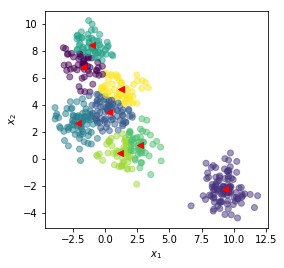

In [21]:
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(X[:,0], X[:,1], alpha=0.5,c=x_assigned)
ax.plot(clusters[:,0],clusters[:,1],"r<")
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

https://flothesof.github.io/k-means-numpy.html

http://cs.joensuu.fi/sipu/datasets/

In [0]:
def initialize_clusters(points, k):
    """Initializes clusters as k randomly selected points from points."""
    return points[np.random.randint(points.shape[0], size=k)]
    
# Function for calculating the distance between centroids
def get_distances(centroid, points):
    """Returns the distance the centroid is from each data point in points."""
    return np.linalg.norm(points - centroid, axis=1)

In [0]:
k = 8
maxiter = 50

# Initialize our centroids by picking random data points
centroids = initialize_clusters(X, k)

# Initialize the vectors in which we will store the
# assigned classes of each data point and the
# calculated distances from each centroid
classes = np.zeros(X.shape[0], dtype=np.float64)
distances = np.zeros([X.shape[0], k], dtype=np.float64)

# Loop for the maximum number of iterations
for i in range(maxiter):
    
    # Assign all points to the nearest centroid
    for i, c in enumerate(centroids):
        distances[:, i] = get_distances(c, X)
        
    # Determine class membership of each point
    # by picking the closest centroid
    classes[:] = np.argmin(distances, axis=1)
    
    # Update centroid location using the newly
    # assigned data point classes
    for c in range(k):
        centroids[c] = np.mean(X[classes == c], 0)

In [31]:
centroids

array([[-2.28916635,  2.52231428],
       [ 1.21056199,  4.75279358],
       [-0.33583621,  3.45162543],
       [ 9.03852035, -1.10626817],
       [-0.93738316,  8.45927916],
       [-1.73110044,  6.93404998],
       [ 9.43307107, -2.79546006],
       [ 1.88525344,  0.78808316]])

Text(0, 0.5, '$x_2$')

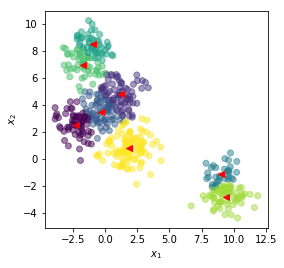

In [32]:
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(X[:,0], X[:,1], alpha=0.5,c=classes)
ax.plot(centroids[:,0],centroids[:,1],"r<")
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')